# Amazon Kindle Books Dataset 2023 Analysis

## About the project

This project focuses on analyzing a dataset containing information on 130,000 Kindle e-books, collected through web scraping in October 2023. 
The goal of the analysis is to explore trends in popular categories, authors, and sellers, as well as understand the impact of different tags (e.g., best-seller, editor’s pick, Goodreads Choice Award) on the popularity of e-books. Additionally, the analysis will explore potential seasonality in e-book popularity.

### Dataset Deatails

This dataset contains data for 130,000 kindle e-books. Publicly available data were scraped on October 2023. Below, the dataset describes the four available tags that can be used to classify a e-book on Kindle.

- asin: The unique Amazon Standard Identification Number for the product.
- title: The name or title of the book or product.
- author: The author(s) or creator(s) of the book.
- soldBy: The vendor or entity selling the product (e.g., Amazon or third-party sellers).
- imgUrl: The URL link to the product's image (cover photo or product photo).
- productURL: The URL link to the product's page on Amazon or another platform.
- stars: The average rating of the product, typically out of 5 stars.
- reviews: The total number of customer reviews or ratings for the product.
- price: The selling price of the product.
- isKindleUnlimited: A boolean (True/False) indicating if the product is available for Kindle Unlimited subscribers.
- category_id: The ID that corresponds to the category the product belongs to.
- isBestSeller: A boolean (True/False) indicating if the product is marked as a best-seller.
- isEditorsPick: A boolean (True/False) indicating if the product is marked as an editor's pick or recommendation.
- isGoodReadsChoice: A boolean (True/False) indicating if the product is a Goodreads Choice Award winner or nominee.
- publishedDate: The date the product or book was published.
- category_name: The name of the category the product belongs to (e.g., Fiction, Non-fiction, etc.).

### Analysis
#### First Step: Data Understanding

##### Inspect the Data
##### Descriptive Statistics

#### Second Step: Data Cleaning and Preprocessing

##### Handling Missing Values
##### Fixing Data Types
##### Handling Duplicates
##### Handling Outliers

#### Third Step : Questions to be answered:

##### What are the Popular Categories, Authors, and Sellers?
###### Based on reviews 
###### Based on stars rating 
##### Which Tags have most impact on the Books popularity?
###### The impact of  tags on popularity based on reviews 
###### The impact of  tags on popularity based on stars rating
##### Is there any seasonality in the popularity of e-books?

### Analysis

In [1284]:
#importing libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### First Step: Data Understanding
##### Inspect the Data
This step involves getting familiar with the dataset by inspecting its structure, variables, and summary statistics.

In [1286]:
#importing data
df=pd.read_csv('kindle_data-v2.csv')
#Structure of data
df.head(3)

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships


In [1290]:
print('Shape of dataset',df.shape)
print('columns of dataset',df.columns)

Shape of dataset (133102, 16)
columns of dataset Index(['asin', 'title', 'author', 'soldBy', 'imgUrl', 'productURL', 'stars',
       'reviews', 'price', 'isKindleUnlimited', 'category_id', 'isBestSeller',
       'isEditorsPick', 'isGoodReadsChoice', 'publishedDate', 'category_name'],
      dtype='object')


##### Descriptive Statistics

In [1292]:
#summary statistics
print('\n Description of dataset \n',df.describe())


 Description of dataset 
                stars        reviews          price    category_id
count  133102.000000  133102.000000  133102.000000  133102.000000
mean        4.404090     887.375779      15.134127      16.287111
std         0.745646    5104.878777      22.254986       8.416924
min         0.000000       0.000000       0.000000       1.000000
25%         4.400000       0.000000       4.990000       9.000000
50%         4.500000       4.000000       9.990000      16.000000
75%         4.700000     365.000000      14.990000      23.000000
max         5.000000  618227.000000     682.000000      31.000000


#### Second Step: Data Cleaning and Preprocessing
This step focuses on preparing the data for analysis by addressing any quality issues such as missing values, duplicates, outliers, and incorrect data types.
##### Handling Missing Values

In [1294]:
print('info of dataset',df.info())
print('empty records \n',df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

In [1296]:
# filling the missing book's author with untitled
df['author'].fillna("Untitled Book", inplace=True)
# filling the missing book's publisher  with untitled
df['soldBy'].fillna("Untitled Publisher", inplace=True)


##### Handiling incorrect data types

In [1298]:
# Convert the 'oublishedDate' column to datetime
df['publishedDate']=pd.to_datetime(df['publishedDate'])

##### Handling Duplicates

In [1300]:
df[df.duplicated(subset='asin')]

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name


##### Handling Outliers

the number of rows before removing outliers 133102
the number of rows after removing outliers 132029
the number of removed rows 1073


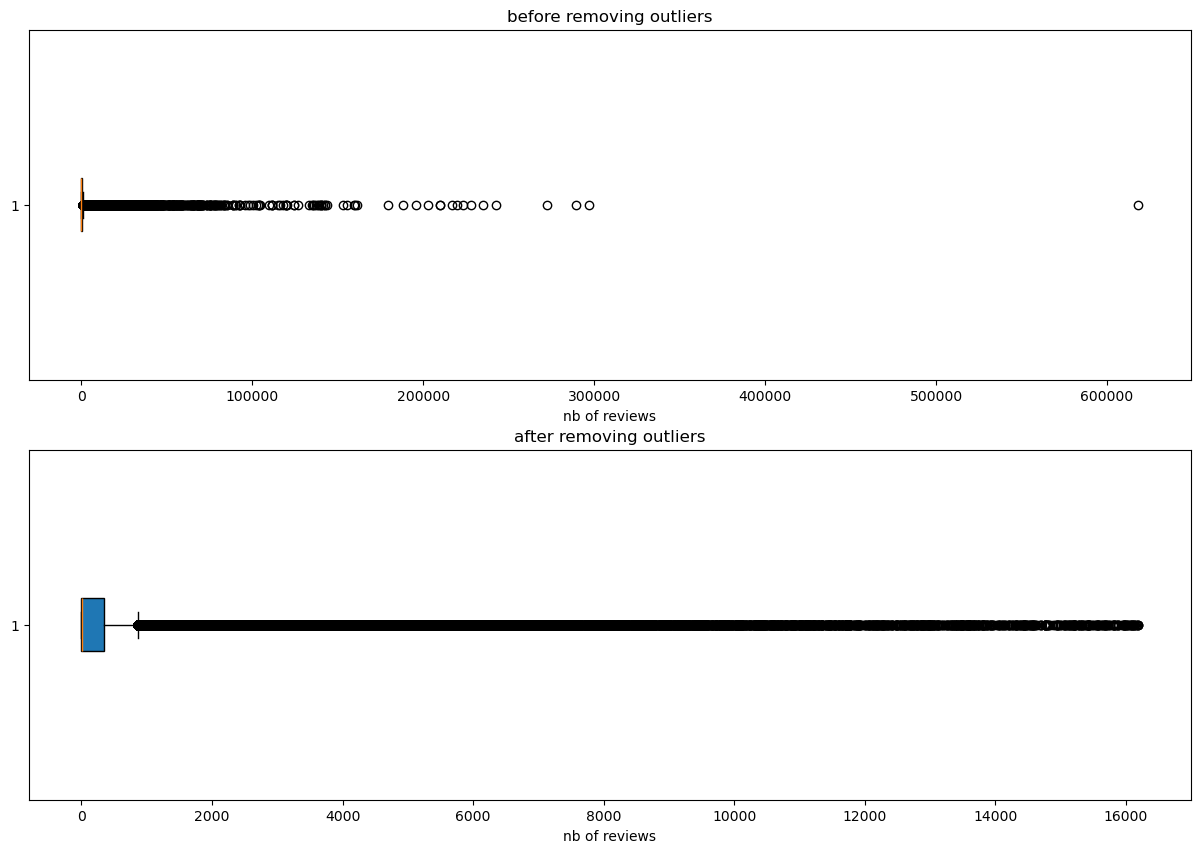

In [1302]:
# using Z score
upper_limit=df['reviews'].mean()+3*df['reviews'].std()
lower_limit=df['reviews'].mean()-3*df['reviews'].std()

#removing outliers 
df_kindle=df[(df['reviews']>lower_limit) & (df['reviews']<upper_limit)]
print("the number of rows before removing outliers",df.shape[0])
print("the number of rows after removing outliers",df_kindle.shape[0])
print("the number of removed rows",df.shape[0]-df_kindle.shape[0])
#plotting the boxplots before and after removing outliers
fig=plt.figure(figsize=(15, 10))
ax1,ax2=fig.subplots(2,1)
ax1.boxplot(df['reviews'],patch_artist=True,vert=False)
ax2.boxplot(df_kindle['reviews'],patch_artist=True,vert=False)
ax1.set_xlabel("nb of reviews")
ax2.set_xlabel("nb of reviews")
ax1.set_title("before removing outliers")
ax2.set_title("after removing outliers")
plt.show()


#### Third Step : Questions to be answered
##### What are the Popular Categories, Authors, and Sellers?
The popularity of categories, authors, and sellers is determined based on the number of reviews and star ratings since we do not have data on actual sales figures. 
###### Based on reviews 

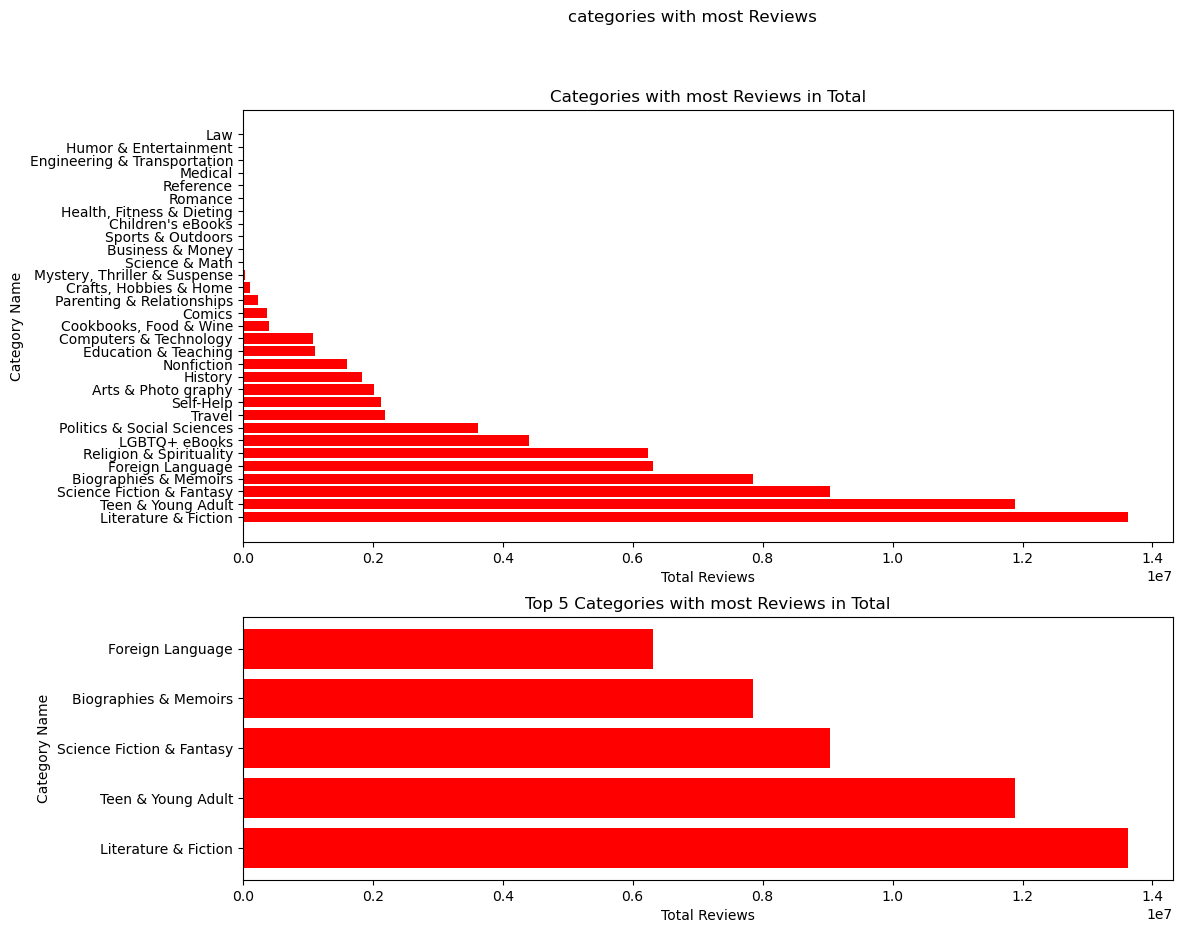

In [1304]:
pop1_category=df_kindle.groupby('category_name').agg(Total_reviews=('reviews','sum')).sort_values('Total_reviews',ascending=False)
fig=plt.figure(figsize=(12,10))
gs=fig.add_gridspec(5,5,hspace=0.8)
ax1=fig.add_subplot(gs[0:3,:])
ax1.barh(pop1_category.index,pop1_category.Total_reviews,color='red')
ax1.set_ylabel('Category Name')
ax1.set_xlabel('Total Reviews')
ax1.set_title('Categories with most Reviews in Total')

ax2=fig.add_subplot(gs[3:5,:])
ax2.barh(pop1_category.index[0:5],pop1_category.Total_reviews[0:5],color='red')
ax2.set_ylabel('Category Name')
ax2.set_xlabel('Total Reviews')
ax2.set_title('Top 5 Categories with most Reviews in Total');
plt.suptitle('categories with most Reviews')
plt.show()

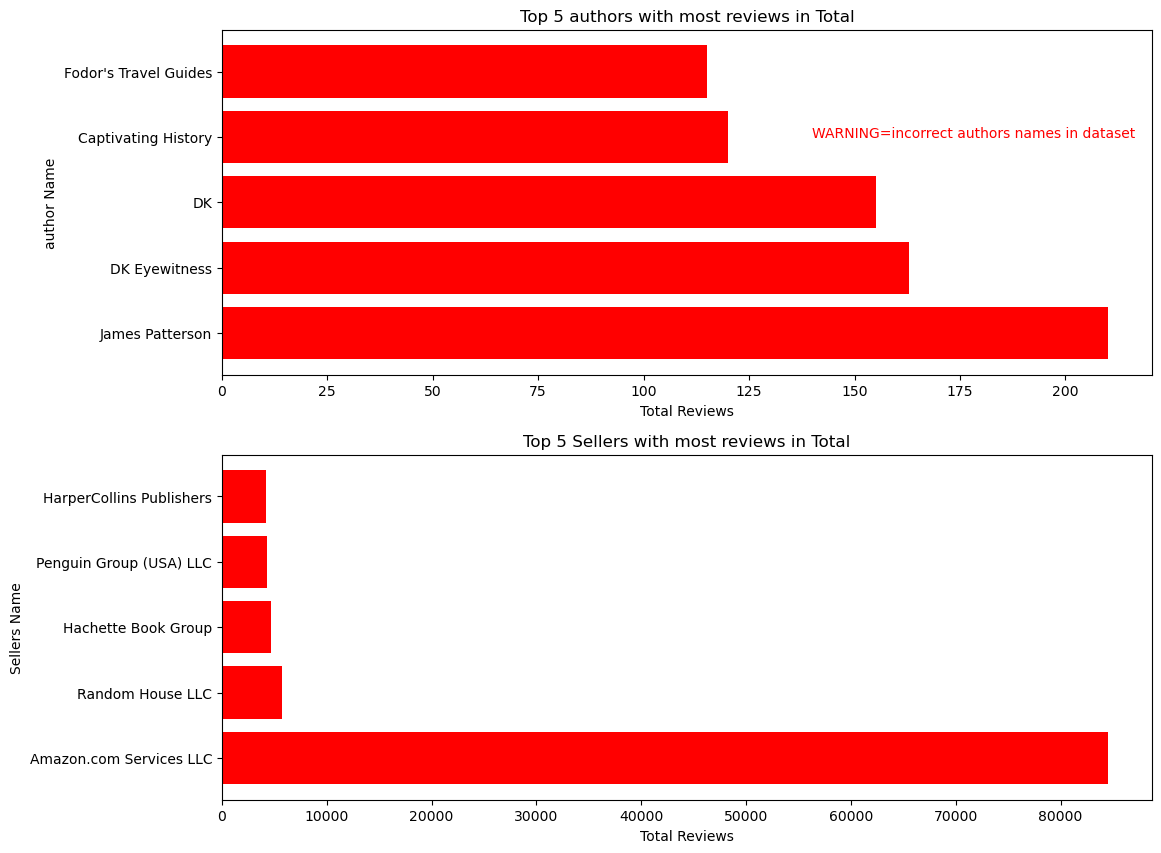

In [1308]:
#list of  author that write many books
pro1_author=df_kindle.groupby('author').agg(Total=('reviews','count')).sort_values('Total',ascending=False)
pro1_author.drop('Untitled Book',inplace=True)

#list of publishers that produce many book
pro1_seller=df_kindle.groupby('soldBy').agg(Total=('reviews','count')).sort_values('Total',ascending=False)
pro1_seller.drop('Untitled Publisher',inplace=True)

#plot only the TOP-5
fig=plt.figure(figsize=(12,10))
gs=fig.add_gridspec(4,4,hspace=0.6)
ax1=fig.add_subplot(gs[0:2,:])
ax1.barh(pro1_author.index[0:5],pro1_author.Total[0:5],color='red')
ax1.set_ylabel('author Name')
ax1.set_xlabel('Total Reviews')
ax1.set_title('Top 5 authors with most reviews in Total');
ax1.text(140,3,'WARNING=incorrect authors names in dataset',color='red')

ax2=fig.add_subplot(gs[2:4,:])
ax2.barh(pro1_seller.index[0:5],pro1_seller.Total[0:5],color='red')
ax2.set_ylabel('Sellers Name')
ax2.set_xlabel('Total Reviews')
ax2.set_title('Top 5 Sellers with most reviews in Total');
plt.show()

###### Based on stars rating 

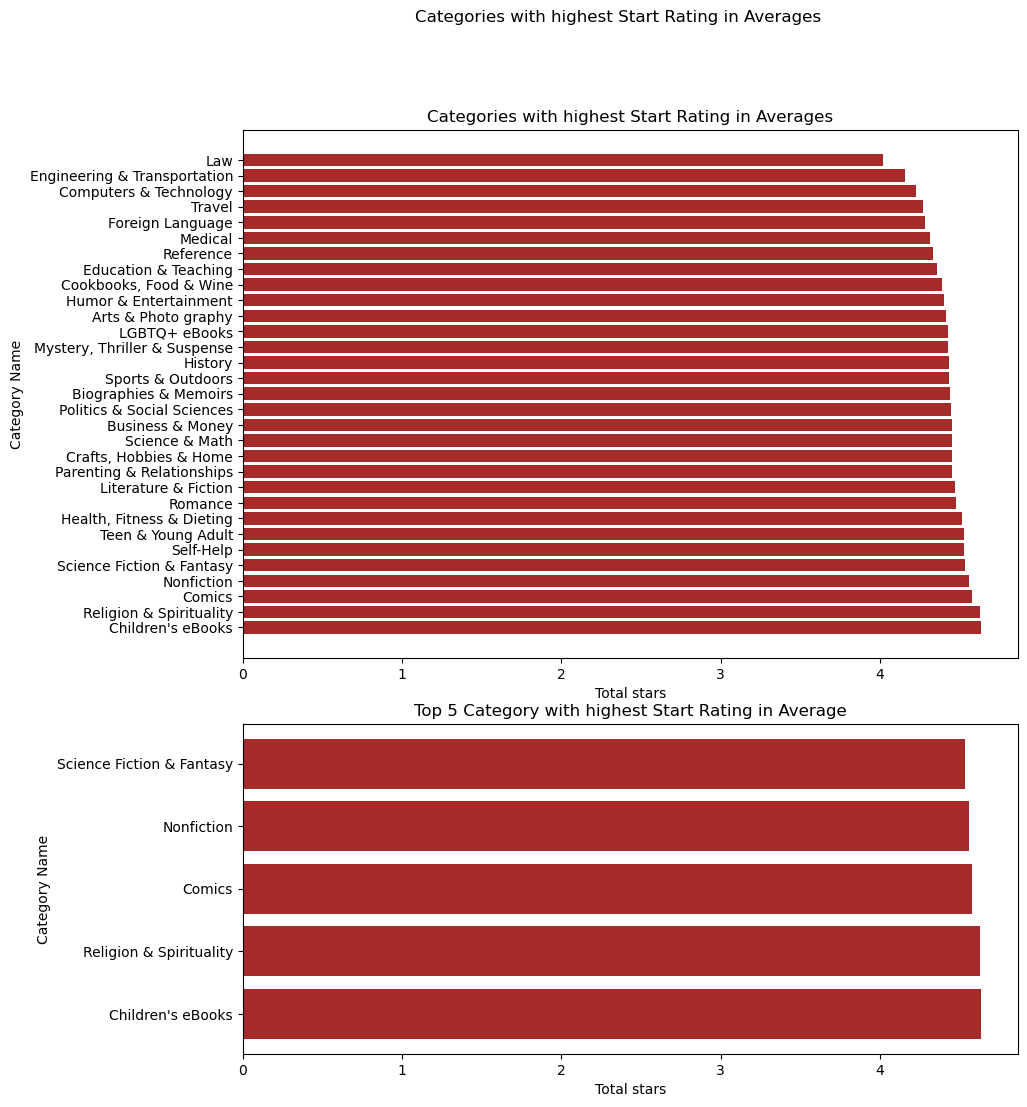

In [1310]:
pop2_category=df_kindle.groupby('category_name').agg(Total_stars=('stars','mean')).sort_values('Total_stars',ascending=False)
fig=plt.figure(figsize=(10,12))
gs=fig.add_gridspec(5,5,hspace=0.5)
ax1=fig.add_subplot(gs[0:3,:])
ax1.barh(pop2_category.index,pop2_category.Total_stars,color='brown')
ax1.set_ylabel('Category Name')
ax1.set_xlabel('Total stars')
ax1.set_title('Categories with highest Start Rating in Averages')


ax2=fig.add_subplot(gs[3:5,:],sharex=ax1)
ax2.barh(pop2_category.index[0:5],pop2_category.Total_stars[0:5],color='brown')
ax2.set_ylabel('Category Name')
ax2.set_xlabel('Total stars')
ax2.set_title('Top 5 Category with highest Start Rating in Average')
plt.suptitle('Categories with highest Start Rating in Averages')
plt.show()

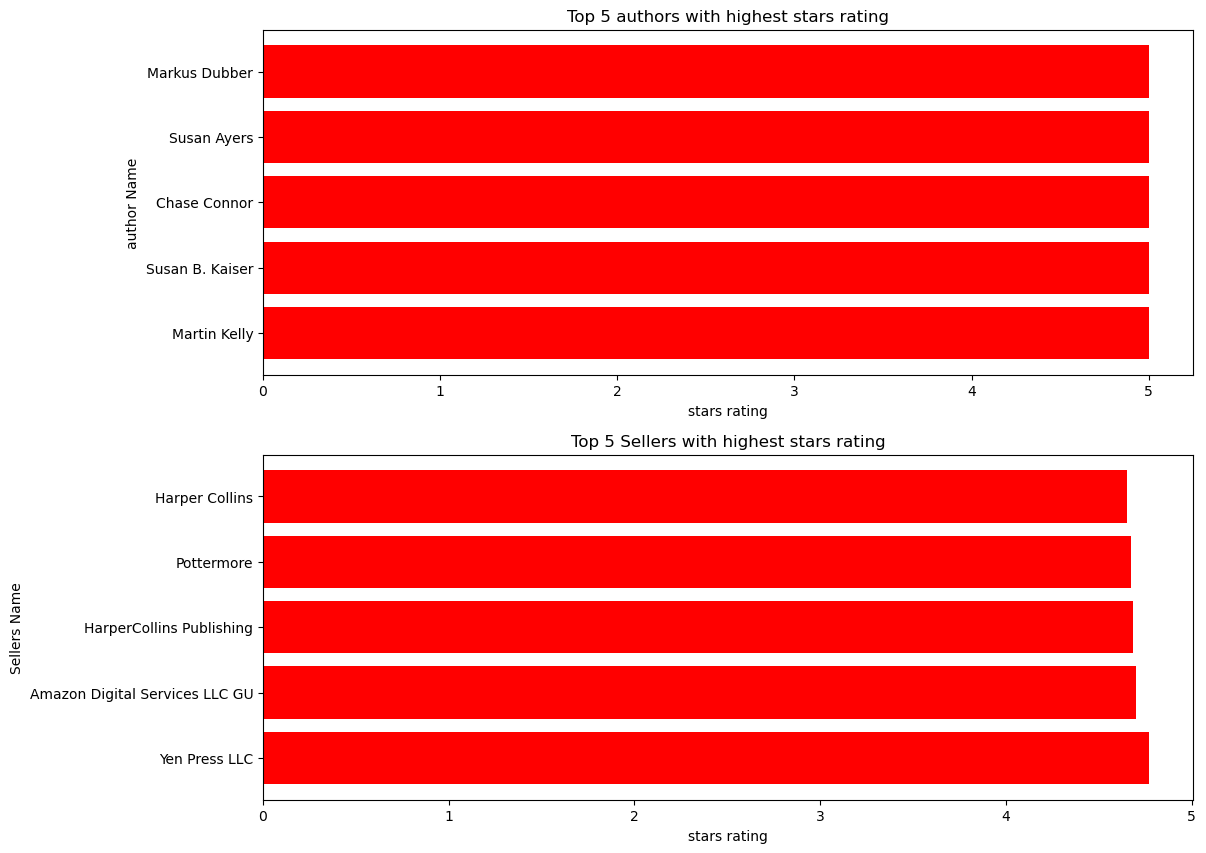

In [1314]:
#list of  author that write many books
pro2_author=df_kindle.groupby('author').agg(Total=('stars','mean')).sort_values('Total',ascending=False)
pro2_author.drop('Untitled Book',inplace=True)

#list of publishers that produce many books
pro2_seller=df_kindle.groupby('soldBy').agg(Total=('stars','mean')).sort_values('Total',ascending=False)
pro2_seller.drop('Untitled Publisher',inplace=True)

#plot only the TOP-5
fig=plt.figure(figsize=(12,10))
gs=fig.add_gridspec(4,4,hspace=0.6)
ax1=fig.add_subplot(gs[0:2,:])
ax1.barh(pro2_author.index[1:6],pro2_author.Total[1:6],color='red')
ax1.set_ylabel('author Name')
ax1.set_xlabel('stars rating')
ax1.set_title('Top 5 authors with highest stars rating');


ax2=fig.add_subplot(gs[2:4,:])
ax2.barh(pro2_seller.index[0:5],pro2_seller.Total[0:5],color='red')
ax2.set_ylabel('Sellers Name')
ax2.set_xlabel('stars rating')
ax2.set_title('Top 5 Sellers with highest stars rating');
plt.show()

##### Which Tags have most impact on the Books popularity?

Below, the dataset describes the four available tags that can be used to classify a e-book on Kindle.

- Kindle Unlimited
- Best Seller
- Editor's Pick
- Goodreads Choice

In order to analyze the impact of these aspects, we will observe the distribution of the number of reviews and star ratings for each title. We will differentiate whether each e-book falls into any of the categories or not. By examining these factors, we can gain insights into the influence and significance of each aspect.

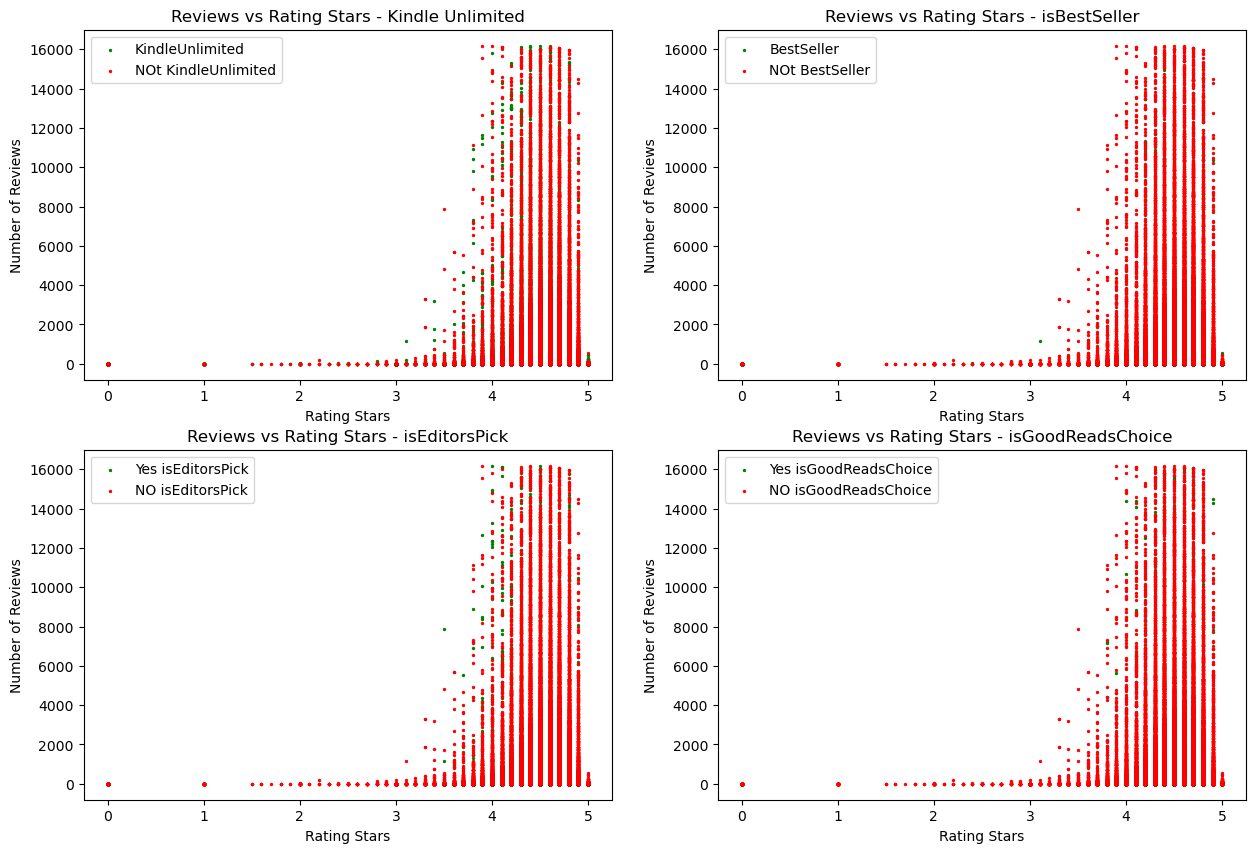

In [1320]:

fig=plt.figure(figsize=(15,10))
ax=fig.subplots(2,2)
ax[0,0].scatter(df_kindle[df_kindle.isKindleUnlimited==True].stars,
                   df_kindle[df_kindle.isKindleUnlimited==True].reviews,s=2,color='green',label='KindleUnlimited')
ax[0,0].scatter(df_kindle[df_kindle.isKindleUnlimited==False].stars,
           df_kindle[df_kindle.isKindleUnlimited==False].reviews,s=2,color='red',label='NOt KindleUnlimited')
ax[0,0].set_ylabel('Number of Reviews')
ax[0,0].set_xlabel('Rating Stars')
ax[0,0].set_title('Reviews vs Rating Stars - Kindle Unlimited');                   
ax[0,0].legend()

ax[0,1].scatter(df_kindle[df_kindle.isBestSeller==True].stars,
                   df_kindle[df_kindle.isBestSeller==True].reviews,s=2,color='green',label='BestSeller')
ax[0,1].scatter(df_kindle[df_kindle.isBestSeller==False].stars,
           df_kindle[df_kindle.isBestSeller==False].reviews,s=2,color='red',label='NOt BestSeller')
ax[0,1].set_ylabel('Number of Reviews')
ax[0,1].set_xlabel('Rating Stars')
ax[0,1].set_title('Reviews vs Rating Stars - isBestSeller');                   
ax[0,1].legend()

ax[1,0].scatter(df_kindle[df_kindle.isEditorsPick==True].stars,
                   df_kindle[df_kindle.isEditorsPick==True].reviews,s=2,color='green',label='Yes isEditorsPick')
ax[1,0].scatter(df_kindle[df_kindle.isEditorsPick==False].stars,
           df_kindle[df_kindle.isEditorsPick==False].reviews,s=2,color='red',label='NO isEditorsPick')
ax[1,0].set_ylabel('Number of Reviews')
ax[1,0].set_xlabel('Rating Stars')
ax[1,0].set_title('Reviews vs Rating Stars - isEditorsPick');                   
ax[1,0].legend()

ax[1,1].scatter(df_kindle[df_kindle.isGoodReadsChoice==True].stars,
                   df_kindle[df_kindle.isGoodReadsChoice==True].reviews,s=2,color='green',label='Yes isGoodReadsChoice')
ax[1,1].scatter(df_kindle[df_kindle.isGoodReadsChoice==False].stars,
           df_kindle[df_kindle.isGoodReadsChoice==False].reviews,s=2,color='red',label='NO isGoodReadsChoice')
ax[1,1].set_ylabel('Number of Reviews')
ax[1,1].set_xlabel('Rating Stars')
ax[1,1].set_title('Reviews vs Rating Stars - isGoodReadsChoice');                   
ax[1,1].legend()
plt.show()



###### The impact of  tags on popularity on reviews

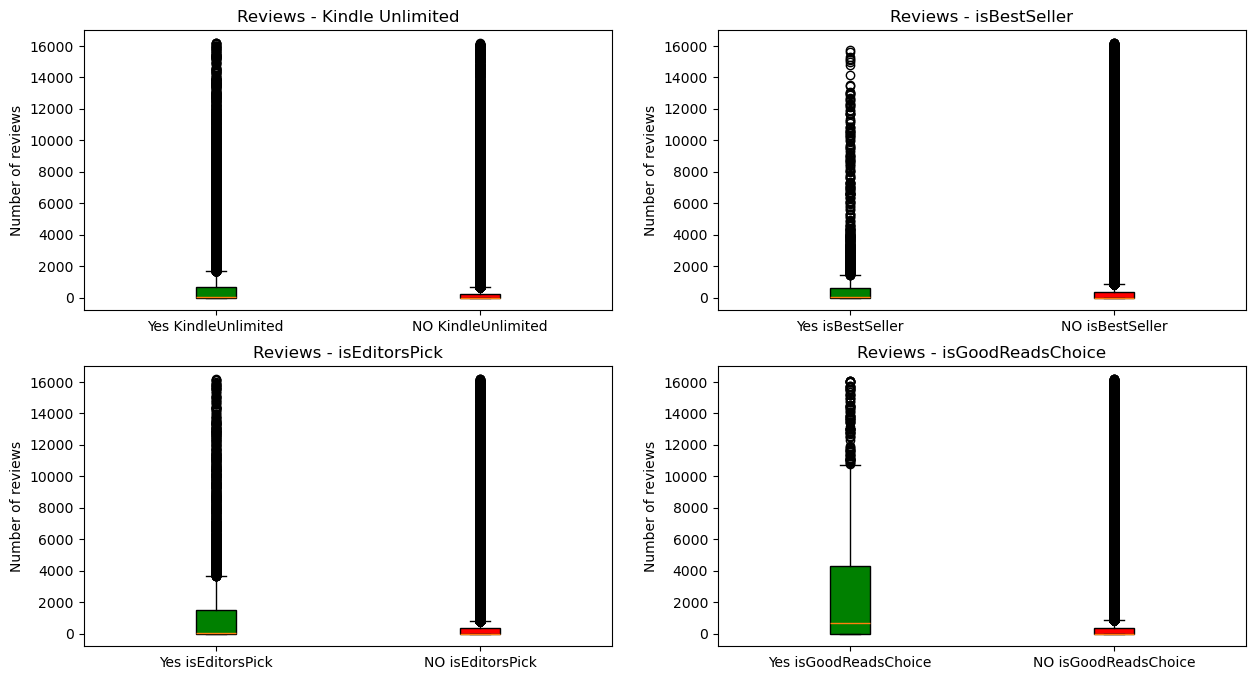

In [1478]:
fig=plt.figure(figsize=(15,8))
ax=fig.subplots(2,2)

#The impact of Kindle Unlimited tag on popularity[reviews]
box_KindleUnlimited=ax[0,0].boxplot([df_kindle[df_kindle.isKindleUnlimited==True].reviews,
                df_kindle[df_kindle.isKindleUnlimited==False].reviews],patch_artist=True,
                           labels=['Yes KindleUnlimited','NO KindleUnlimited'])
box_KindleUnlimited['boxes'][0].set(facecolor='green')
box_KindleUnlimited['boxes'][1].set(facecolor='red')
ax[0,0].set_ylabel('Number of reviews')
ax[0,0].set_title('Reviews - Kindle Unlimited');       

#The impact of Best Seller tag on popularity[reviews]
box_BestSeller=ax[0,1].boxplot([df_kindle[df_kindle.isBestSeller==True].reviews,
                df_kindle[df_kindle.isBestSeller==False].reviews],patch_artist=True,
                           labels=['Yes isBestSeller','NO isBestSeller'])
box_BestSeller['boxes'][0].set(facecolor='green')
box_BestSeller['boxes'][1].set(facecolor='red')
ax[0,1].set_ylabel('Number of reviews')
ax[0,1].set_title('Reviews - isBestSeller'); 

#The impact of Editor's Pick tag on popularity[reviews]
box_EditorsPick=ax[1,0].boxplot([df_kindle[df_kindle.isEditorsPick==True].reviews,
                df_kindle[df_kindle.isEditorsPick==False].reviews],patch_artist=True,
                           labels=['Yes isEditorsPick','NO isEditorsPick'])
box_EditorsPick['boxes'][0].set(facecolor='green')
box_EditorsPick['boxes'][1].set(facecolor='red')
ax[1,0].set_ylabel('Number of reviews')
ax[1,0].set_title('Reviews - isEditorsPick');  

#The impact of Goodreads Choice tag on popularity[reviews]
box_GoodReadsChoice=ax[1,1].boxplot([df_kindle[df_kindle.isGoodReadsChoice==True].reviews,
                df_kindle[df_kindle.isGoodReadsChoice==False].reviews],patch_artist=True,
                           labels=['Yes isGoodReadsChoice','NO isGoodReadsChoice'])
box_GoodReadsChoice['boxes'][0].set(facecolor='green')
box_GoodReadsChoice['boxes'][1].set(facecolor='red')
ax[1,1].set_ylabel('Number of reviews')
ax[1,1].set_title('Reviews - isGoodReadsChoice');

In [1414]:
#The impact of Kindle Unlimited tag on popularity[reviews]
print(df_kindle.groupby('isKindleUnlimited')['reviews'].mean())
kindle_ratio = df.groupby('isKindleUnlimited')['reviews'].mean()[True]/df.groupby('isKindleUnlimited')['reviews'].mean()[False]
print(f'The Average of Reviews for Kindle Unlimited is {kindle_ratio:.2f} higher than for non Kindle Unlimited \n')

#The impact of Best Seller tag on popularity[reviews]
print(df_kindle.groupby('isBestSeller')['reviews'].mean())
ratio_BestSeller = df.groupby('isBestSeller')['reviews'].mean()[True]/df.groupby('isBestSeller')['reviews'].mean()[False]
print(f'The Average of Reviews for Best Sellers is {ratio_BestSeller:.2f} higher than for non Best Sellers \n')

#The impact of Editor's Pick tag on popularity[reviews]
print(df_kindle.groupby('isEditorsPick')['reviews'].mean())
ratio_EditorPick = df.groupby('isEditorsPick')['reviews'].mean()[True]/df.groupby('isEditorsPick')['reviews'].mean()[False]
print(f'The Average of Reviews for Editors Pick is {ratio_EditorPick:.2f} higher than for not Editors Pick \n')

#The impact of Goodreads Choice tag on popularity[reviews]
print(df_kindle.groupby('isGoodReadsChoice')['reviews'].mean())
ratio_GoodReader = df.groupby('isGoodReadsChoice')['reviews'].mean()[True]/df.groupby('isGoodReadsChoice')['reviews'].mean()[False]
print(f'The Average of Reviews for Good Reads Choice is {ratio_GoodReader:.2f} higher than for non Good Readers Choice \n')

isKindleUnlimited
False    506.895831
True     764.654227
Name: reviews, dtype: float64
The Average of Reviews for Kindle Unlimited is 1.27 higher than for non Kindle Unlimited 

isBestSeller
False    569.942844
True     950.708029
Name: reviews, dtype: float64
The Average of Reviews for Best Sellers is 1.95 higher than for non Best Sellers 

isEditorsPick
False     535.900109
True     1539.339296
Name: reviews, dtype: float64
The Average of Reviews for Editors Pick is 5.66 higher than for not Editors Pick 

isGoodReadsChoice
False     554.885415
True     2823.900322
Name: reviews, dtype: float64
The Average of Reviews for Good Reads Choice is 9.29 higher than for non Good Readers Choice 



###### The impact of  tags on popularity based on stars rating

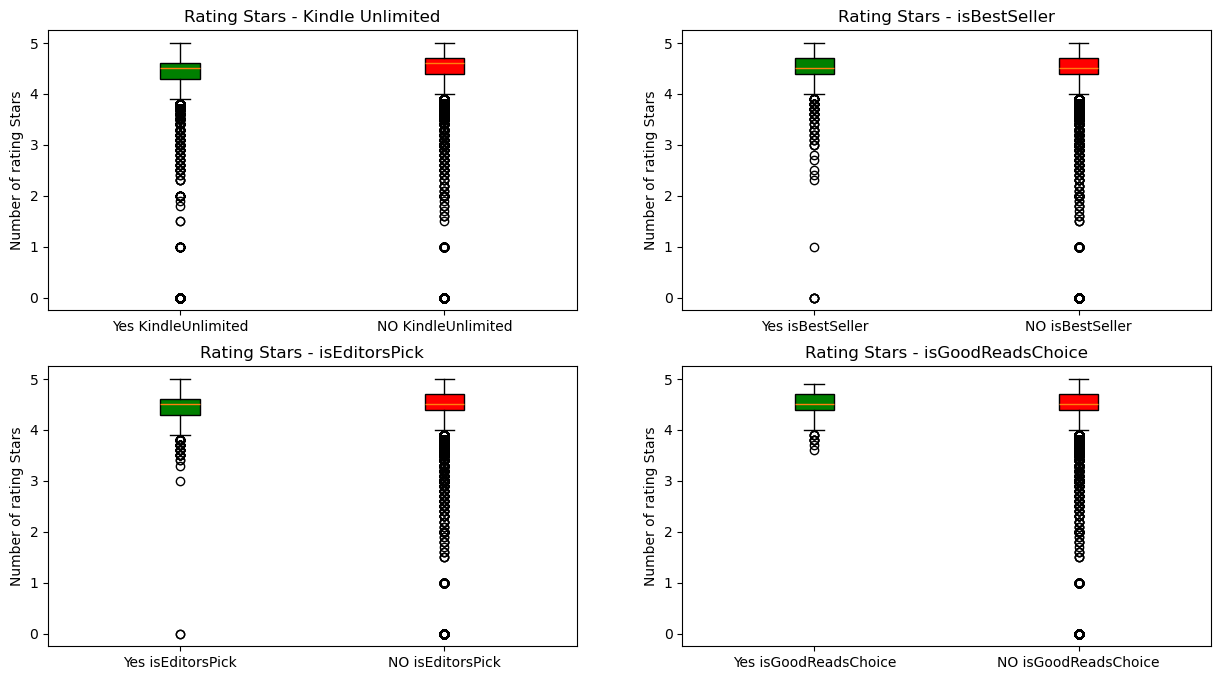

In [1390]:
fig=plt.figure(figsize=(15,8))
ax=fig.subplots(2,2)

#The impact of Kindle Unlimited tag on popularity[stars]
box_KindleUnlimited=ax[0,0].boxplot([df_kindle[df_kindle.isKindleUnlimited==True].stars,
                df_kindle[df_kindle.isKindleUnlimited==False].stars],patch_artist=True,
                           labels=['Yes KindleUnlimited','NO KindleUnlimited'])
box_KindleUnlimited['boxes'][0].set(facecolor='green')
box_KindleUnlimited['boxes'][1].set(facecolor='red')
ax[0,0].set_ylabel('Number of rating Stars')
ax[0,0].set_title('Rating Stars - Kindle Unlimited');       

#The impact of Best Seller tag on popularity[stars]
box_BestSeller=ax[0,1].boxplot([df_kindle[df_kindle.isBestSeller==True].stars,
                df_kindle[df_kindle.isBestSeller==False].stars],patch_artist=True,
                           labels=['Yes isBestSeller','NO isBestSeller'])
box_BestSeller['boxes'][0].set(facecolor='green')
box_BestSeller['boxes'][1].set(facecolor='red')
ax[0,1].set_ylabel('Number of rating Stars')
ax[0,1].set_title('Rating Stars - isBestSeller'); 

#The impact of Editor's Pick tag on popularity[stars]
box_EditorsPick=ax[1,0].boxplot([df_kindle[df_kindle.isEditorsPick==True].stars,
                df_kindle[df_kindle.isEditorsPick==False].stars],patch_artist=True,
                           labels=['Yes isEditorsPick','NO isEditorsPick'])
box_EditorsPick['boxes'][0].set(facecolor='green')
box_EditorsPick['boxes'][1].set(facecolor='red')
ax[1,0].set_ylabel('Number of rating Stars')
ax[1,0].set_title('Rating Stars - isEditorsPick');  

#The impact of Goodreads Choice tag on popularity[stars]
box_GoodReadsChoice=ax[1,1].boxplot([df_kindle[df_kindle.isGoodReadsChoice==True].stars,
                df_kindle[df_kindle.isGoodReadsChoice==False].stars],patch_artist=True,
                           labels=['Yes isGoodReadsChoice','NO isGoodReadsChoice'])
box_GoodReadsChoice['boxes'][0].set(facecolor='green')
box_GoodReadsChoice['boxes'][1].set(facecolor='red')
ax[1,1].set_ylabel('Number of rating Stars')
ax[1,1].set_title('Rating Stars - isGoodReadsChoice');


In [1404]:
#The impact of Kindle Unlimited tag on popularity[stars]
print(df_kindle.groupby('isKindleUnlimited')['stars'].mean())
kindle_ratio = df.groupby('isKindleUnlimited')['stars'].mean()[True]/df.groupby('isKindleUnlimited')['stars'].mean()[False]
print(f'The Average of rating stars for Kindle Unlimited is {kindle_ratio:.2f} higher than for non Kindle Unlimited \n')

#The impact of Best Seller tag on popularity[stars]
print(df_kindle.groupby('isBestSeller')['stars'].mean())
ratio_BestSeller = df.groupby('isBestSeller')['stars'].mean()[True]/df.groupby('isBestSeller')['stars'].mean()[False]
print(f'The Average of rating stars for Best Sellers is {ratio_BestSeller:.2f} higher than for non Best Sellers \n')

#The impact of Editor's Pick tag on popularity[stars]
print(df_kindle.groupby('isEditorsPick')['stars'].mean())
ratio_EditorPick = df.groupby('isEditorsPick')['stars'].mean()[True]/df.groupby('isEditorsPick')['stars'].mean()[False]
print(f'The Average of rating stars for Editors Pick is {ratio_EditorPick:.2f} higher than for not Editors Pick \n')

#The impact of Goodreads Choice tag on popularity[stars]
print(df_kindle.groupby('isGoodReadsChoice')['stars'].mean())
ratio_GoodReader = df.groupby('isGoodReadsChoice')['stars'].mean()[True]/df.groupby('isGoodReadsChoice')['stars'].mean()[False]
print(f'The Average of rating stars for Good Reads Choice is {ratio_GoodReader:.2f} higher than for non Good Readers Choice \n')

isKindleUnlimited
False    4.405543
True     4.397056
Name: stars, dtype: float64
The Average of rating stars for Kindle Unlimited is 1.00 higher than for non Kindle Unlimited 

isBestSeller
False    4.401783
True     4.490693
Name: stars, dtype: float64
The Average of rating stars for Best Sellers is 1.02 higher than for non Best Sellers 

isEditorsPick
False    4.400896
True     4.459631
Name: stars, dtype: float64
The Average of rating stars for Editors Pick is 1.01 higher than for not Editors Pick 

isGoodReadsChoice
False    4.402235
True     4.510932
Name: stars, dtype: float64
The Average of rating stars for Good Reads Choice is 1.02 higher than for non Good Readers Choice 



It is possible to clearly observe , that EditorsPick and GoodReadsChoice tags have greater influence on e-Books popularity [stars rating,Reviews] on Kindle.

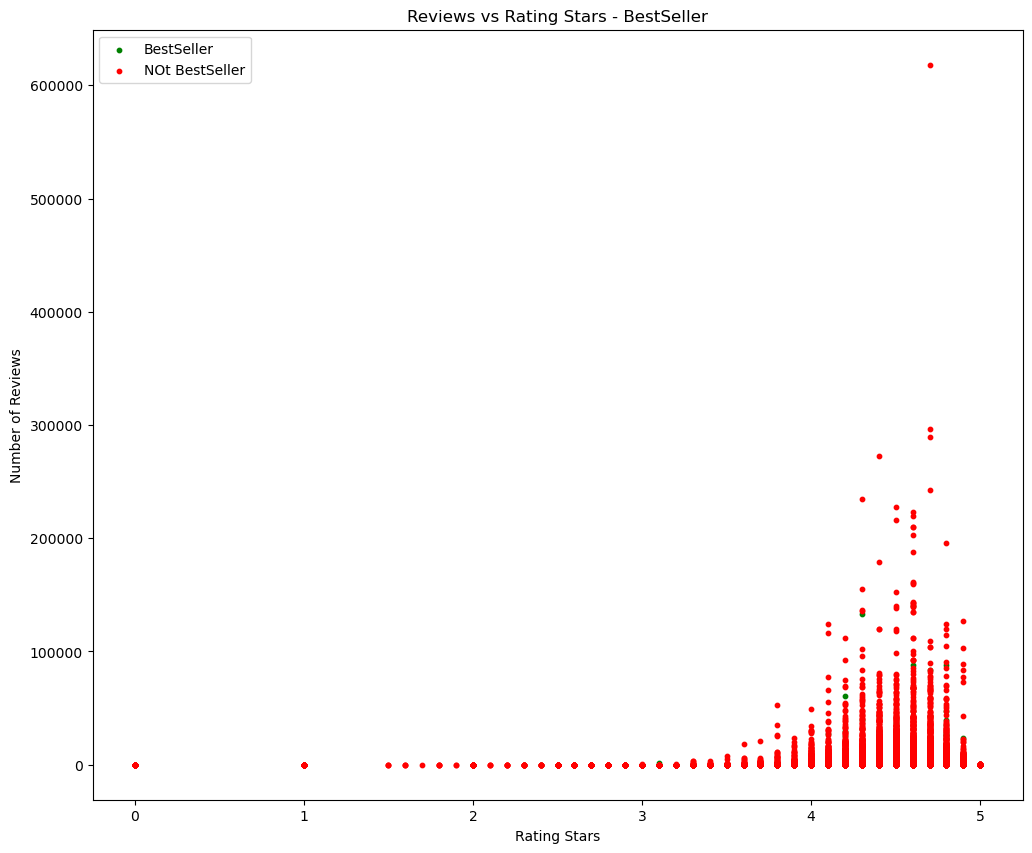

In [840]:
map_dict={True:1,False:0}
df_kindle['isBestSeller_num']=df_kindle['isBestSeller'].map(map_dict)
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot()
ax.scatter(df_kindle[df_kindle.isBestSeller_num==1].stars,
                   df_kindle[df_kindle.isBestSeller_num==1].reviews,s=10,color='green',label='BestSeller')
ax.scatter(df_kindle[df_kindle.isBestSeller_num==0].stars,
           df_kindle[df_kindle.isBestSeller_num==0].reviews,s=10,color='red',label='NOt BestSeller')
ax.set_ylabel('Number of Reviews')
ax.set_xlabel('Rating Stars')
ax.set_title('Reviews vs Rating Stars - BestSeller');                   
plt.legend()
plt.show()

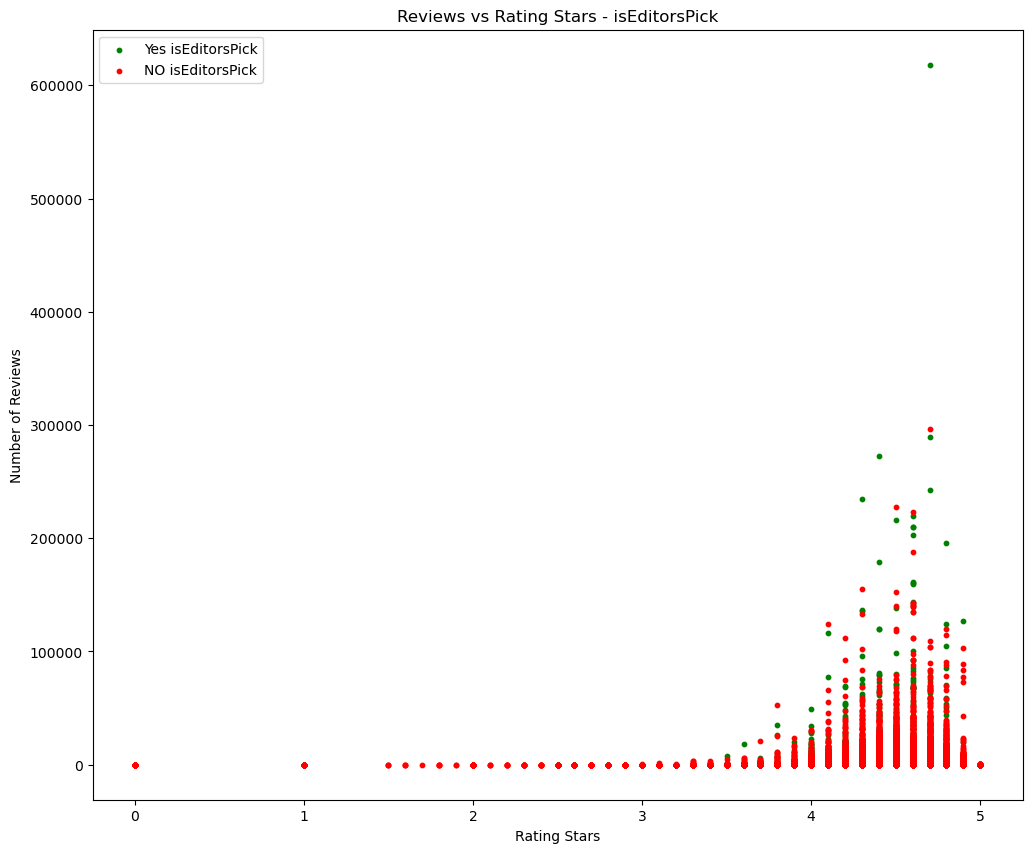

In [838]:
map_dict = { True:1, False:0}

df_kindle['isEditorsPick_num'] = df_kindle['isEditorsPick'].map(map_dict)
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot()
ax.scatter(df_kindle[df_kindle.isEditorsPick_num==1].stars,
                   df_kindle[df_kindle.isEditorsPick_num==1].reviews,s=10,color='green',label='Yes isEditorsPick')
ax.scatter(df_kindle[df_kindle.isEditorsPick_num==0].stars,
           df_kindle[df_kindle.isEditorsPick_num==0].reviews,s=10,color='red',label='NO isEditorsPick')
ax.set_ylabel('Number of Reviews')
ax.set_xlabel('Rating Stars')
ax.set_title('Reviews vs Rating Stars - isEditorsPick');                   
plt.legend()
plt.show()

##### Is there any seasonality in the popularity of e-books?

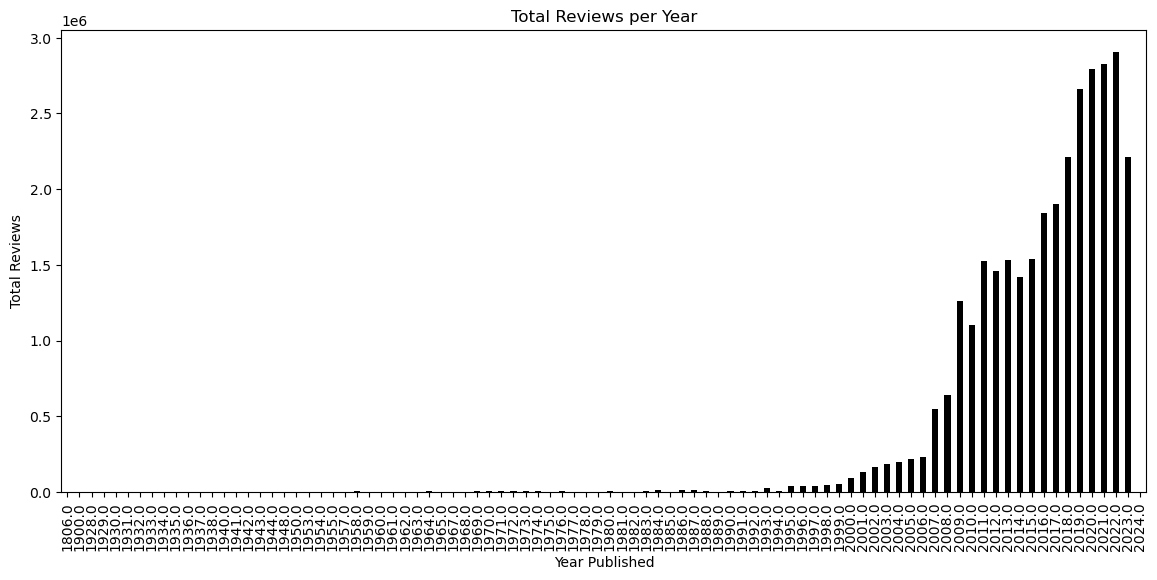

In [1473]:
df_kindle_grouped = df_kindle.groupby('year_publishe')
df_kindle_grouped['reviews'].sum().plot(kind = 'bar', figsize = (14,6),color='black')
plt.ylabel('Total Reviews')
plt.xlabel('Year Published')
plt.title('Total Reviews per Year');

The titles released after 2000 started to receive more reviews, indicating a clear upward trend.
The peak was reached in 2020, most likely due to the pandemic, during which several technology companies experienced a noticeable increase in their activities.
However, since then, the numbers have been declining and are currently below pre-pandemic levels.